In [3]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import os
from matplotlib.patches import Rectangle
import glob
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v1/'

In [5]:

plotdir = '/home/rfinn/research/Virgo/plots/'

### Read in tables

In [10]:
%run ~/github/Virgo/programs/readtables.py

In [11]:
len(v.ha)

6797

## Halpha Statistics

In [26]:
print('number observed in Halpha = ',sum(v.main['HAobsflag']))
print('number with Halpha SNR > 1 = ',sum(v.main['HAflag']))
print('number of CO sources observed in Halpha = ',sum(v.main['HAobsflag'] & v.main['COflag']))

number observed in Halpha =  295
number with Halpha SNR > 1 =  105
number of CO sources observed in Halpha =  134


#### Update on statistics after incorporating Nelvy INT data

In [8]:
print('number observed in Halpha = ',sum(v.main['HAobsflag']))
print('number with Halpha SNR > 1 = ',sum(v.main['HAflag']))
print('number of CO sources observed in Halpha = ',sum(v.main['HAobsflag'] & v.main['COflag']))

number observed in Halpha =  331
number with Halpha SNR > 1 =  150
number of CO sources observed in Halpha =  145


# catalog statistics #

In [29]:
print('number with HL data = ',sum(v.main['HLflag']))
print('fraction with HL data = ',sum(v.main['HLflag'])/len(v.main))

number with HL data =  6636
fraction with HL data =  0.976313079299691


In [34]:
radec = (v.main['RA'] > 192.) & (v.main['RA'] < 209) & (v.main['DEC']> 0.) & (v.main['DEC'] < 50.) 
radec_flag = radec & (v.main['DEC'] >(2*(v.main['RA'] - 205.) + 20) ) & (v.main['DEC'] < (2*(v.main['RA'] - 205.) + 55))
filament = radec_flag & (v.main['vr'] >2000.) & (v.main['vr'] < 3238.)

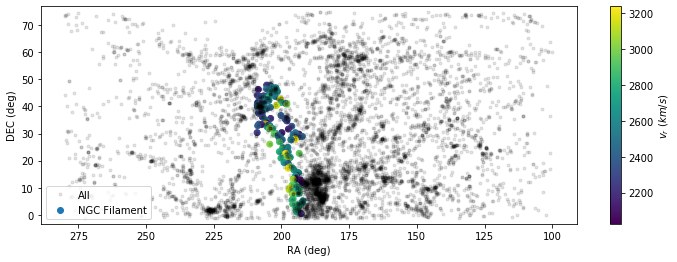

In [35]:
plt.figure(figsize=(12,4))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='All')
plt.scatter(v.main['RA'][filament],v.main['DEC'][filament],c=v.main['vr'][filament],label='NGC Filament')
plt.gca().invert_xaxis()
plt.legend()
cb = plt.colorbar(label='$v_r \ (km/s)$')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.axis('equal')
plt.savefig(plotdir+'vf_ngcfilament.png')

# Number of NGC Galaxies with Halpha Data#

In [36]:
ngchaflag = (v.ha['HAflag'] & filament)
print(sum(ngchaflag))

27


In [38]:
# number of CO galaxies with Halpha
nCO = sum(filament & v.main['COflag'])
nCO_ha = sum(ngchaflag & v.main['COflag'])
print('number of galaxies in the filament = ',sum(filament))
print('number of CO galaxies in the filament = ',nCO)
print('number of CO galaxies w/ha in the filament = ',nCO_ha)
print('percent of CO sources w/ha = {:.1f}'.format(nCO_ha/nCO*100))

number of galaxies in the filament =  259
number of CO galaxies in the filament =  44
number of CO galaxies w/ha in the filament =  19
percent of CO sources w/ha = 43.2


In [42]:
v.ha

VFID,RA,DEC,vr,radius,NEDname,prefix,HAflag,REDSHIFT,ZDIST,GAL_RA,GAL_DEC,ELLIP_RA,ELLIP_DEC,FILT_COR,R_FWHM,H_FWHM,POINTING,BBOX,FILTER_RATIO,GAL_XC,GAL_XC_ERR,GAL_YC,GAL_YC_ERR,GAL_MAG,GAL_MAG_ERR,GAL_RE,GAL_RE_ERR,GAL_N,GAL_N_ERR,GAL_BA,GAL_BA_ERR,GAL_PA,GAL_PA_ERR,GAL_SKY,GAL_CHISQ,GAL_SERSASYM [10],GAL_SERSASYM_ERR [10],GAL_SERSASYM_ERROR,GAL_SERSASYM_CHISQ,GAL_SERSASYM_RA,GAL_SERSASYM_DEC,ELLIP_XCENTROID,ELLIP_YCENTROID,ELLIP_EPS,ELLIP_THETA,ELLIP_GINI,ELLIP_GINI2,ELLIP_AREA,ELLIP_SUM,ELLIP_SUM_MAG,ELLIP_ASYM,ELLIP_ASYM_ERR,ELLIP_HSUM,ELLIP_HSUM_MAG,ELLIP_HASYM,ELLIP_HASYM_ERR,R_SKYNOISE,H_SKYNOISE,GAL_R24,GAL_R24_ERR,GAL_R25,GAL_R25_ERR,GAL_R26,GAL_R26_ERR,GAL_R_F25,GAL_R_F25_ERR,GAL_R24V,GAL_R24V_ERR,GAL_R25V,GAL_R25V_ERR,GAL_R_F50,GAL_R_F50_ERR,GAL_R_F75,GAL_R_F75_ERR,GAL_M24,GAL_M24_ERR,GAL_M25,GAL_M25_ERR,GAL_M26,GAL_M26_ERR,GAL_F_30R24,GAL_F_30R24_ERR,GAL_F_R24,GAL_F_R24_ERR,GAL_C30,GAL_C30_ERR,GAL_PETRO_R,GAL_PETRO_R_ERR,GAL_PETRO_FLUX,GAL_PETRO_FLUX_ERR,GAL_PETRO_R50,GAL_PETRO_R50_ERR,GAL_PETRO_R90,GAL_PETRO_R90_ERR,GAL_PETRO_CON,GAL_PETRO_CON_ERR,GAL_PETRO_MAG,GAL_PETRO_MAG_ERR,GAL_HR16,GAL_HR16_ERR,GAL_HR17,GAL_HR17_ERR,GAL_HR_F25,GAL_HR_F25_ERR,GAL_HR_F50,GAL_HR_F50_ERR,GAL_HR_F75,GAL_HR_F75_ERR,GAL_HM16,GAL_HM16_ERR,GAL_HM17,GAL_HM17_ERR,GAL_HF_30R24,GAL_HF_30R24_ERR,GAL_HF_R24,GAL_HF_R24_ERR,GAL_HC30,GAL_HC30_ERR,GAL_HR_F95R24,GAL_HR_F95R24_ERR,GAL_HF_TOT,GAL_HF_TOT_ERR,GAL_HPETRO_R,GAL_HPETRO_R_ERR,GAL_HPETRO_FLUX,GAL_HPETRO_FLUX_ERR,GAL_HPETRO_R50,GAL_HPETRO_R50_ERR,GAL_HPETRO_R90,GAL_HPETRO_R90_ERR,GAL_HPETRO_CON,GAL_HPETRO_CON_ERR,GAL_HPETRO_MAG,GAL_HPETRO_MAG_ERR,GAL_LOG_SFR_HA,GAL_LOG_SFR_HA_ERR,GAL_SSFR_IN,GAL_SSFR_IN_ERR,GAL_SSFR_OUT,GAL_SSFR_OUT_ERR,R24,R24_ERR,R25,R25_ERR,R26,R26_ERR,R_F25,R_F25_ERR,R24V,R24V_ERR,R25V,R25V_ERR,R_F50,R_F50_ERR,R_F75,R_F75_ERR,M24,M24_ERR,M25,M25_ERR,M26,M26_ERR,F_30R24,F_30R24_ERR,F_R24,F_R24_ERR,C30,C30_ERR,PETRO_R,PETRO_R_ERR,PETRO_FLUX,PETRO_FLUX_ERR,PETRO_R50,PETRO_R50_ERR,PETRO_R90,PETRO_R90_ERR,PETRO_CON,PETRO_CON_ERR,PETRO_MAG,PETRO_MAG_ERR,HR16,HR16_ERR,HR17,HR17_ERR,HR_F25,HR_F25_ERR,HR_F50,HR_F50_ERR,HR_F75,HR_F75_ERR,HM16,HM16_ERR,HM17,HM17_ERR,HF_30R24,HF_30R24_ERR,HF_R24,HF_R24_ERR,HC30,HC30_ERR,HR_F95R24,HR_F95R24_ERR,HF_TOT,HF_TOT_ERR,HPETRO_R,HPETRO_R_ERR,HPETRO_FLUX,HPETRO_FLUX_ERR,HPETRO_R50,HPETRO_R50_ERR,HPETRO_R90,HPETRO_R90_ERR,HPETRO_CON,HPETRO_CON_ERR,HPETRO_MAG,HPETRO_MAG_ERR,LOG_SFR_HA,LOG_SFR_HA_ERR,SSFR_IN,SSFR_IN_ERR,SSFR_OUT,SSFR_OUT_ERR,COMMENT,HAobsflag
bytes8,float64,float64,float32,float32,bytes30,bytes38,bool,float32,float32,float32,float32,float32,float32,float64,float32,float32,bytes10,bytes22,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,fl

In [39]:
t = v.ha['VFID','NSAIDV0','Date Obs','Pointing','Date Obs2','Telescope'][ngchaflag]
t.write('/home/rfinn/research/Virgo/Halpha/ngcfilament_halpha.fits',format='fits')

KeyError: 'NSAIDV0'

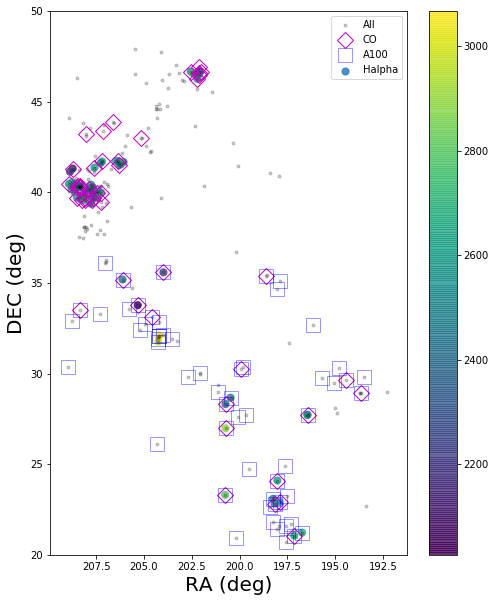

In [107]:
plt.figure(figsize=(8,10))
plt.plot(maintab['RA'][filament],maintab['DEC'][filament],'k.',alpha=.2,label='All')
plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
# plot CO sources
flag = filament & maintab['COflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
flag = filament & maintab['A100flag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
cb = plt.colorbar()
plt.legend()#label='vr (km/s)')
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.ylim(20,50)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCfilament.png')

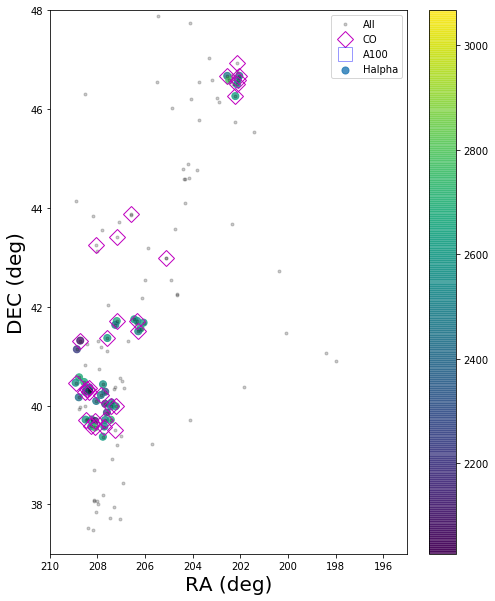

In [108]:
plt.figure(figsize=(8,10))
plt.plot(maintab['RA'][filament],maintab['DEC'][filament],'k.',alpha=.2,label='All')
plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
# plot CO sources
flag = filament & maintab['COflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
flag = filament & maintab['A100flag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
cb = plt.colorbar()
plt.legend()#label='vr (km/s)')

plt.axis([195,210,37,48])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCgroup.png')

# Identifying Filament Galaxies using Supergalactic Coordinates #

- We have a new table from Gianluca that includes SGX, SGY, SGZ coordinates for each galaxy.
- We can use the information in Kim+2016 paper to identify NGC filament galaxies based on SG coordinates.
- Compare this to selecting NGC filament galaxies based on RA, DEC, and vr.
- table is called: vf_north_v0_main_env_prop_H0_74_0.fits
- According to Kim+2016, the NGC filament is located between

| SG Coord | Min | Max |
|----------|-----|-----|
| SGX | -16.04 | 4.23 |
| SGY | 21.71| 26.53 |
| SGZ | -1.19 | 8.92 |

In [116]:
envtab = Table.read(tabledir+'vf_north_v0_main_env_prop_H0_74_0.fits')

In [129]:
xflag = (envtab['SGX'] > -16.04) & (envtab['SGX'] < 4.23) 
yflag = (envtab['SGY'] > 21.71) & (envtab['SGY'] < 26.53) 
zflag = (envtab['SGZ'] > -1.19) & (envtab['SGZ'] < 8.92) 
filament2 = xflag & yflag & zflag

In [133]:
print('number of galaxies in the filament = ',sum(filament2))
print('number of NGC galaxies w/CO = ',sum(filament2 & maintab['COflag']))
print('number of NGC galaxies w/Halpha = ',sum(filament2 & hatab['haflag']))

number of galaxies in the filament =  125
number of NGC galaxies w/CO =  1
number of NGC galaxies w/Halpha =  0


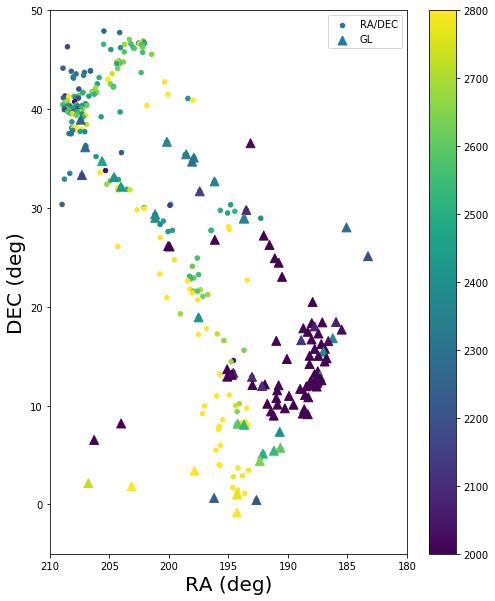

In [157]:
plt.figure(figsize=(8,10))
plt.scatter(maintab['RA'][filament],maintab['DEC'][filament],c=maintab['vr'][filament],s=20,vmin=2000,vmax=2800,label='RA/DEC')
plt.scatter(maintab['RA'][filament2],maintab['DEC'][filament2],c=maintab['vr'][filament2],marker='^',s=80,vmin=2000,vmax=2800,label='GL')
#plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
## plot CO sources
#flag = filament & maintab['COflag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
#flag = filament & maintab['A100flag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
plt.legend()
cb = plt.colorbar()
#plt.legend()#label='vr (km/s)')
plt.axis([180,210,-5,50])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
#plt.ylim(20,50)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCfilament-GLcomparison.png')

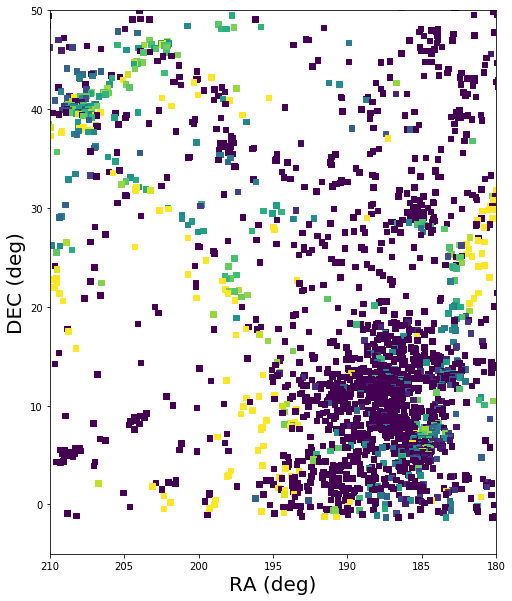

In [146]:
plt.figure(figsize=(8,10))
plt.scatter(maintab['RA'],maintab['DEC'],c=maintab['vr'],marker='s',s=30,vmin=2000,vmax=2800)
#plt.scatter(maintab['RA'][filament2],maintab['DEC'][filament2],c=maintab['vr'][filament2],vmin=2000,vmax=2800)
#plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
## plot CO sources
#flag = filament & maintab['COflag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
#flag = filament & maintab['A100flag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
#cb = plt.colorbar()
#plt.legend()#label='vr (km/s)')
plt.axis([180,210,-5,50])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
#plt.ylim(20,50)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCfilament-GLcomparison.png')

# Size measure to pass into legacy survey photometry#



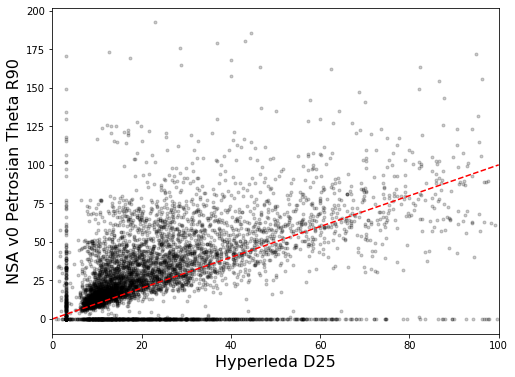

In [221]:
plt.figure(figsize=(8,6))
x = 10**(hltab['logd25']-1)*60/2 # convert from 0.1 arcmin to arcsec
y = nsa0tab['PETROTH90']*1.3
plt.plot(x,y,'k.',alpha=.2)
plt.xlabel('Hyperleda D25',fontsize=16)
plt.ylabel('NSA v0 Petrosian Theta R90',fontsize=16)
plt.xlim(0,100)
x1,x2 = plt.xlim()
xl = np.linspace(x1,x2,100)
plt.plot(xl,xl,'r--')


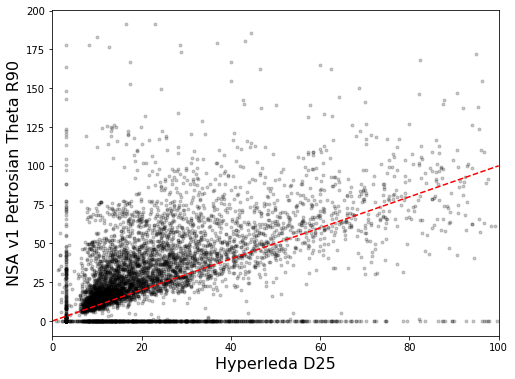

In [227]:
plt.figure(figsize=(8,6))
x = 10**(hltab['logd25']-1)*60/2 # convert from 0.1 arcmin to arcsec
y = nsatab['PETRO_TH90']*1.3
plt.plot(x,y,'k.',alpha=.2)
plt.xlabel('Hyperleda D25',fontsize=16)
plt.ylabel('NSA v1 Petrosian Theta R90',fontsize=16)
plt.xlim(0,100)
x1,x2 = plt.xlim()
xl = np.linspace(x1,x2,100)
plt.plot(xl,xl,'r--')

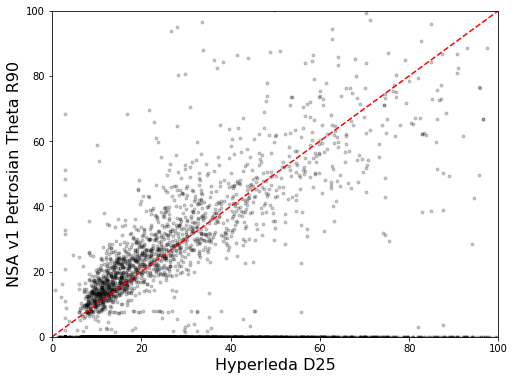

In [226]:
plt.figure(figsize=(8,6))
x = 10**(hltab['logd25']-1)*60/2 # convert from 0.1 arcmin to arcsec
y = a100sdsstab['petroR90_r']*1.4
plt.plot(x,y,'k.',alpha=.2)
plt.xlabel('Hyperleda D25',fontsize=16)
plt.ylabel('NSA v1 Petrosian Theta R90',fontsize=16)
plt.xlim(0,100)
x1,x2 = plt.xlim()
plt.ylim(x1,x2)
xl = np.linspace(x1,x2,100)
plt.plot(xl,xl,'r--')

In [179]:
# select galaxies with a valid D25
d25_flag = hltab['e_logd25'] != 0
no_radius_flag = ~d25_flag & ~maintab['NSAV0flag']
print(sum(no_radius_flag))

49


In [180]:
sum(maintab['NSAflag'][no_radius_flag])

39

In [181]:
a100_only = maintab['A100flag'] & ~maintab['HLflag'] & ~maintab['NSAflag'] & ~maintab['NSAV0flag']
sum(a100_only)

9

Make a size array that  uses
- logD25 if it exists
- size from NSA V0, if it exists
- size from NSA V1, if it exists
- size from A100 sdss catalog (petroR90_r)

We expect 1 galaxy to have no size estimate 
- identify this galaxy
- print its RA, DEC
- look it up in the legacy viewer or sdss finding chart tool

# Displaying Cutout Images #

In [11]:
r = fits.getdata('/home/rfinn/research/Virgo/gui-test2/v17-VFID2145-R.fits')
ha = fits.getdata('/home/rfinn/research/Virgo/gui-test2/v17-VFID2145-CS.fits')

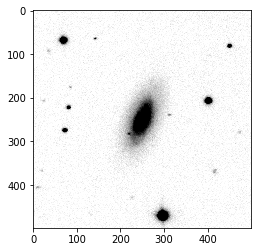

In [10]:
plt.figure()
plt.imshow(r,vmin=0,vmax=3,cmap='gray_r')

# Creating Image of the Specific SFR #

In [16]:
ssfr = ha/(.0425*r)

[150, 350, 150, 350]

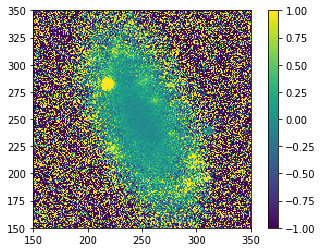

In [24]:
plt.figure()
plt.imshow(ssfr,vmin=-1,vmax=1)
plt.colorbar()
plt.axis([150,350,150,350])

Illustrate each stage of analysis

# Compare my R mag and NSA mag

In [6]:
os.chdir(plotdir)
%run ~/github/Virgo/programs/readtables.py

In [9]:
v.ha

VFID,RA,DEC,vr,radius,NEDname,prefix,HAflag,REDSHIFT,ZDIST,GAL_RA,GAL_DEC,ELLIP_RA,ELLIP_DEC,FILT_COR,R_FWHM,H_FWHM,POINTING,BBOX,FILTER_RATIO,GAL_XC,GAL_XC_ERR,GAL_YC,GAL_YC_ERR,GAL_MAG,GAL_MAG_ERR,GAL_RE,GAL_RE_ERR,GAL_N,GAL_N_ERR,GAL_BA,GAL_BA_ERR,GAL_PA,GAL_PA_ERR,GAL_SKY,GAL_CHISQ,GAL_SERSASYM [10],GAL_SERSASYM_ERR [10],GAL_SERSASYM_ERROR,GAL_SERSASYM_CHISQ,GAL_SERSASYM_RA,GAL_SERSASYM_DEC,ELLIP_XCENTROID,ELLIP_YCENTROID,ELLIP_EPS,ELLIP_THETA,ELLIP_GINI,ELLIP_GINI2,ELLIP_AREA,ELLIP_SUM,ELLIP_SUM_MAG,ELLIP_ASYM,ELLIP_ASYM_ERR,ELLIP_HSUM,ELLIP_HSUM_MAG,ELLIP_HASYM,ELLIP_HASYM_ERR,R_SKYNOISE,H_SKYNOISE,GAL_R24,GAL_R24_ERR,GAL_R25,GAL_R25_ERR,GAL_R26,GAL_R26_ERR,GAL_R_F25,GAL_R_F25_ERR,GAL_R24V,GAL_R24V_ERR,GAL_R25V,GAL_R25V_ERR,GAL_R_F50,GAL_R_F50_ERR,GAL_R_F75,GAL_R_F75_ERR,GAL_M24,GAL_M24_ERR,GAL_M25,GAL_M25_ERR,GAL_M26,GAL_M26_ERR,GAL_F_30R24,GAL_F_30R24_ERR,GAL_F_R24,GAL_F_R24_ERR,GAL_C30,GAL_C30_ERR,GAL_PETRO_R,GAL_PETRO_R_ERR,GAL_PETRO_FLUX,GAL_PETRO_FLUX_ERR,GAL_PETRO_R50,GAL_PETRO_R50_ERR,GAL_PETRO_R90,GAL_PETRO_R90_ERR,GAL_PETRO_CON,GAL_PETRO_CON_ERR,GAL_PETRO_MAG,GAL_PETRO_MAG_ERR,GAL_HR16,GAL_HR16_ERR,GAL_HR17,GAL_HR17_ERR,GAL_HR_F25,GAL_HR_F25_ERR,GAL_HR_F50,GAL_HR_F50_ERR,GAL_HR_F75,GAL_HR_F75_ERR,GAL_HM16,GAL_HM16_ERR,GAL_HM17,GAL_HM17_ERR,GAL_HF_30R24,GAL_HF_30R24_ERR,GAL_HF_R24,GAL_HF_R24_ERR,GAL_HC30,GAL_HC30_ERR,GAL_HR_F95R24,GAL_HR_F95R24_ERR,GAL_HF_TOT,GAL_HF_TOT_ERR,GAL_HPETRO_R,GAL_HPETRO_R_ERR,GAL_HPETRO_FLUX,GAL_HPETRO_FLUX_ERR,GAL_HPETRO_R50,GAL_HPETRO_R50_ERR,GAL_HPETRO_R90,GAL_HPETRO_R90_ERR,GAL_HPETRO_CON,GAL_HPETRO_CON_ERR,GAL_HPETRO_MAG,GAL_HPETRO_MAG_ERR,GAL_LOG_SFR_HA,GAL_LOG_SFR_HA_ERR,GAL_SSFR_IN,GAL_SSFR_IN_ERR,GAL_SSFR_OUT,GAL_SSFR_OUT_ERR,R24,R24_ERR,R25,R25_ERR,R26,R26_ERR,R_F25,R_F25_ERR,R24V,R24V_ERR,R25V,R25V_ERR,R_F50,R_F50_ERR,R_F75,R_F75_ERR,M24,M24_ERR,M25,M25_ERR,M26,M26_ERR,F_30R24,F_30R24_ERR,F_R24,F_R24_ERR,C30,C30_ERR,PETRO_R,PETRO_R_ERR,PETRO_FLUX,PETRO_FLUX_ERR,PETRO_R50,PETRO_R50_ERR,PETRO_R90,PETRO_R90_ERR,PETRO_CON,PETRO_CON_ERR,PETRO_MAG,PETRO_MAG_ERR,HR16,HR16_ERR,HR17,HR17_ERR,HR_F25,HR_F25_ERR,HR_F50,HR_F50_ERR,HR_F75,HR_F75_ERR,HM16,HM16_ERR,HM17,HM17_ERR,HF_30R24,HF_30R24_ERR,HF_R24,HF_R24_ERR,HC30,HC30_ERR,HR_F95R24,HR_F95R24_ERR,HF_TOT,HF_TOT_ERR,HPETRO_R,HPETRO_R_ERR,HPETRO_FLUX,HPETRO_FLUX_ERR,HPETRO_R50,HPETRO_R50_ERR,HPETRO_R90,HPETRO_R90_ERR,HPETRO_CON,HPETRO_CON_ERR,HPETRO_MAG,HPETRO_MAG_ERR,LOG_SFR_HA,LOG_SFR_HA_ERR,SSFR_IN,SSFR_IN_ERR,SSFR_OUT,SSFR_OUT_ERR,COMMENT,HAobsflag
bytes8,float64,float64,float32,float32,bytes30,bytes38,bool,float32,float32,float32,float32,float32,float32,float64,float32,float32,bytes10,bytes22,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,fl

In [11]:
v.nsav0

VFID,RA_1,DEC_1,NEDname,IAUNAME,SUBDIR,RA_2,DEC_2,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,ZLG,ZDIST,ZDIST_ERR,NSAID,NMGY [7],NMGY_IVAR [7],OK,RNMGY [7],ABSMAG [7],AMIVAR [7],EXTINCTION [7],KCORRECT [7],KCOEFF [5],MTOL [7],B300,B1000,METS,MASS,XCEN,YCEN,NPROF [7],"PROFMEAN [15,7]","PROFMEAN_IVAR [15,7]","QSTOKES [15,7]","USTOKES [15,7]","BASTOKES [15,7]","PHISTOKES [15,7]",PETROFLUX [7],PETROFLUX_IVAR [7],FIBERFLUX [7],FIBERFLUX_IVAR [7],BA50,PHI50,BA90,PHI90,SERSICFLUX [7],SERSICFLUX_IVAR [7],SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY [7],CLUMPY [7],DFLAGS [7],AID,PID,DVERSION,PROFTHETA [15],PETROTHETA,PETROTH50,PETROTH90,SERSIC_TH50,OBJNO,PLATE,FIBERID,MJD,COEFF [7],VDISP,D4000,D4000ERR,FA,FAERR,S2FLUX,S2FLUXERR,S2EW,S2EWERR,S2VMEAS,S2VMERR,S2RATIO,HAFLUX,HAFLUXERR,HAEW,HAEWERR,HAVMEAS,HAVMERR,N2FLUX,N2FLUXERR,N2EW,N2EWERR,N2VMEAS,N2VMERR,HBFLUX,HBFLUXERR,HBEW,HBEWERR,HBVMEAS,HBVMERR,O1FLUX,O1FLUXERR,O1EW,O1EWERR,O1VMEAS,O1VMERR,O2FLUX,O2FLUXERR,O2EW,O2EWERR,O2VMEAS,O2VMERR,O3FLUX,O3FLUXERR,O3EW,O3EWERR,O3VMEAS,O3VMERR,AHGEW,AHGEWERR,AHDEW,AHDEWERR,NE3EW,NE3EWERR,NE5EW,NE5EWERR,AV,S2NSAMP,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,NSA0flag
bytes8,float64,float64,bytes30,bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,uint8,int16,bytes3,float32,float32,float32,float32,float32,int32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,bytes8,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,bytes6,bytes23,bytes8,int32,float64,float64,bool
VFID0000,185.86877249999998,74.9522485,NGC 4363,,,0.0,0.0,0,0,0,0,0,0,0.0,0.0,,0.0,0,0,0,,0.0,0.0,0.0,0.0,0.0,0,0.0 .. 0.0,0.0 .. 0.0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0,0,,0.0 .. 0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,0,0.0,0.0,False
VFID0001,182.208,74.9042778,NGC 4133,,,0.0,0.0,0,0,0,0,0,0,0.0,0.0,,0.0,0,0,0,,0.0,0.0,0.0,0.0,0.0,0,0.0 .. 0.0,0.0 .. 0.0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0,0,,0.0 .. 0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,0,0.0,0.0,False
VFID0002,145.944663,74.8595778,NGC 2977,,,0.0,0.0,0,0,0,0,0,0,0.0,0.0,,0.0,0,0,0,,0.0,0.0,0.0,0.0,0.0,0,0.0 .. 0.0,0.0 .. 0.0,0,0.0 .

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


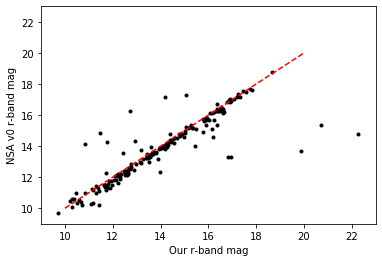

In [20]:
plt.figure()
nsamag = 22.5 - 2.5*np.log10(v.nsav0['NMGY'][:,4])
plt.plot(v.ha['GAL_MAG'],nsamag,'k.')
plt.axis([9,23,9,23])
plt.xlabel('Our r-band mag')
plt.ylabel('NSA v0 r-band mag')
xl = np.linspace(10,20,100)
plt.plot(xl,xl,'r--')

# Positions of Halpha Sources

In [8]:
def plot_spines():
    sfiles = glob.glob(homedir+'/research/Virgo/tables-north/spines/filament*.fits')
    ncolor = 0
    for i,f in enumerate(sfiles):
        spine  = Table.read(f)
        plt.plot(spine['ra'],spine['dec'],c=mycolors[ncolor],label=os.path.basename(f).replace('filament_spine_','').replace('.fits','').replace('_Filament',''),lw=3)
        ncolor += 1
        if ncolor > len(mycolors)-1:
            ncolor = 0

Text(0.5, 1.0, 'Filamentary Structures Surrounding the Virgo Cluster')

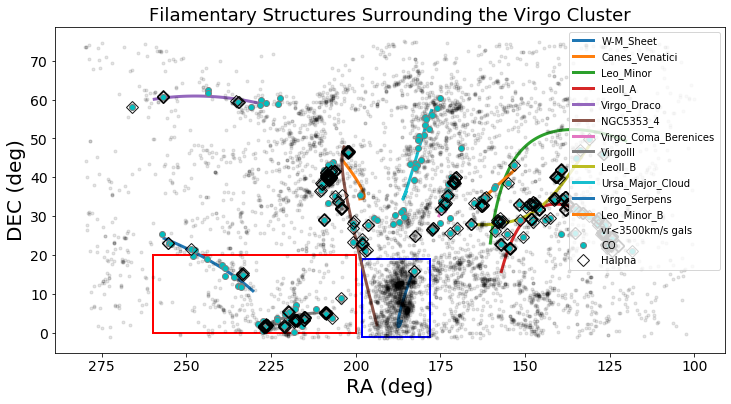

In [12]:
plt.figure(figsize=(12,6))
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='vr<3500km/s gals')
# plot CO sources
flag = v.main['COflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=6,alpha=1,label='CO',mec='0.5')
flag = v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'kD',alpha=.9,mfc='None',markersize=9,label='Halpha')


# add a rectangle for Blanco DD time, spring 2021
rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
plt.gca().add_artist(rect)

# add a rectangle for Blanco DD time, spring 2021
rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)


# Adding in galaxies observed as part of Halpha Groups Survey #



In [6]:
homedir = os.getenv("HOME")

catalog_dir = homedir+'/research/HalphaGroups/catalogs/'
plot_dir = homedir+'/research/HalphaGroups/plots/'
ha = Table.read(catalog_dir+'uat_halpha_nsa.fits')
vr = ha['Z']*3.e5
virgoflag = vr < 3500

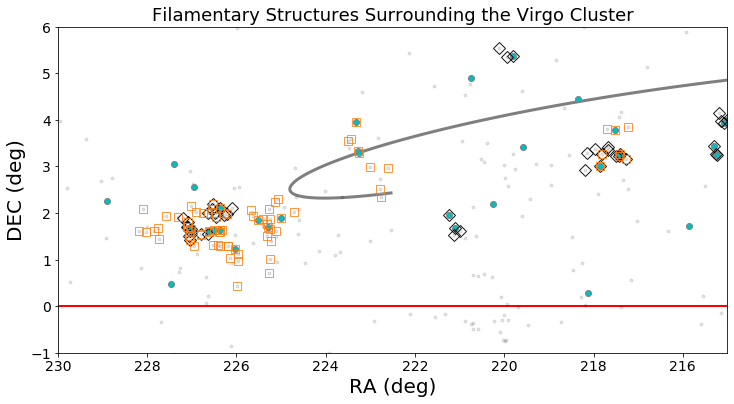

In [23]:
plt.figure(figsize=(12,6))
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='vr<3500km/s gals')
# plot CO sources
flag = v.main['COflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=6,alpha=1,label='CO',mec='0.5')
flag = v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'kD',alpha=.9,mfc='None',markersize=9,label='Halpha')


# add a rectangle for Blanco DD time, spring 2021
rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
plt.gca().add_artist(rect)

# add a rectangle for Blanco DD time, spring 2021
rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
plt.gca().add_artist(rect)

plt.axis([215,230,-1,6])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(loc='upper right',fontsize=8)
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)

plt.plot(ha['RA'][virgoflag],ha['DEC'][virgoflag],'gs',color=mycolors[1],markersize=8,mfc='None', label=r'$H\alpha \ v_r<3500$',alpha=0.8)


In [25]:
4096*.425/60


29.013333333333332

In [26]:
"{:03d}".format(1213)

'1213'